## PROBLEM ANALYSIS
explore the problem to resolve, in particular the dataset (text + distribution)

In [2]:
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth",10000)

# loading data
XTrain = pd.read_csv('c:/Users/I051796/Projects/CES/data/input_train.csv', sep=';')
XTest = pd.read_csv('c:/Users/I051796/Projects/CES/data/input_test.csv', sep=';')
YTrain = pd.read_csv('c:/Users/I051796/Projects/CES/data/label.csv', sep=';')

In [15]:
# merging feature space and the label on ID column
YXTrain = XTrain.merge(YTrain, on='ID')
YXTrain.head()

,ID,question,intention
0,0,"bonjour, je m suis trompé de forum pour ma question alors je la repose ici. je pris pour la première fois hier du paroxétine et ce matin c'est une catastrophe. picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement. j'en suis à deux crises depuis 5 heure du mat. la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous",28
1,1,est ce que le motilium me soulagera contre les nausées?,31
2,2,"mon médecin m'a prescrit adenyl. au 2ème cachet des maux de tête terribles et au 3ème palpitations, sueurs froides, chaleur intense dans la tête, tremblements, fourmillements dans la lèvre supérieure, difficultés à respirer.. dès l'arrêt du médicament tous les symptômes ont disparu. cela est-il déjà arrivé à quelqu'un??",28
3,3,Est-ce qu'il existe une forme adaptée aux enfant de 5ans du Micropakine ?,44
4,4,mon medecin me soigne pour une rhino pharingite et m'a prescrit du amoxicilline comme anti biotique. Est-ce vraiment pour cette indication?,31


### Target distribution

number of target classes : 51


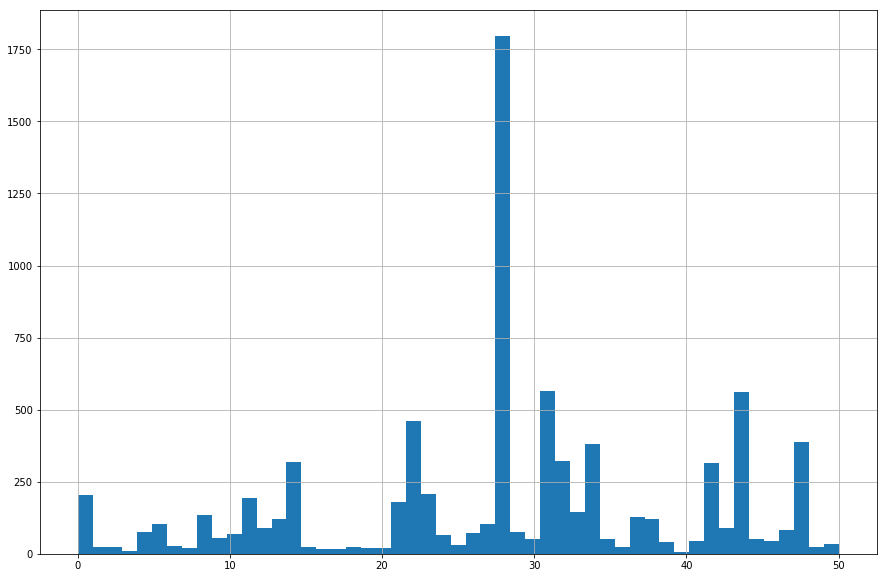

In [13]:
# show up intention distribution
%matplotlib inline
import matplotlib.pyplot as plt

print("number of target classes : {0}".format(len(YTrain['intention'].unique())))
YTrain['intention'].hist(bins=51,figsize=(15,10))
pass

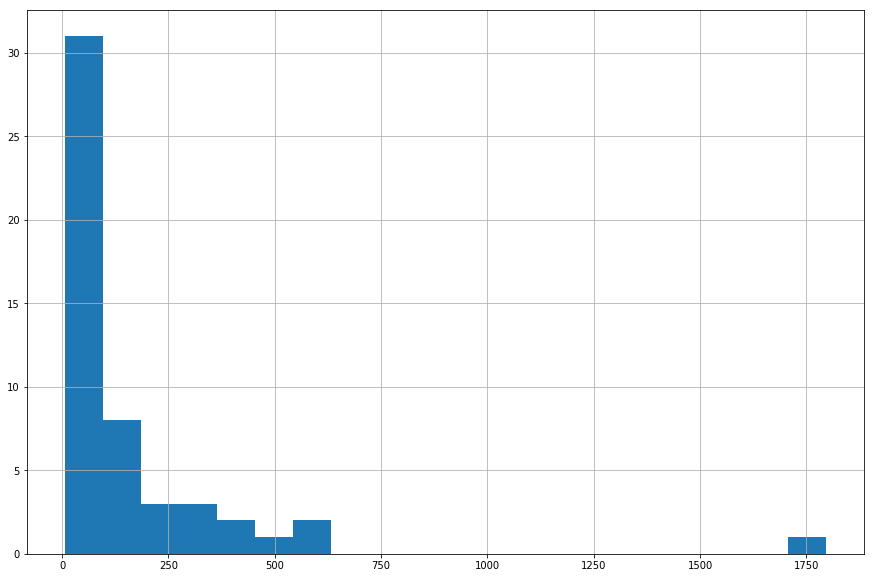

In [44]:
# show up number of obervations per class + basic stats
freqPerTargetClass = YXTrain[['ID','intention']].groupby(['intention']).agg({'ID':['count']})

freqPerTargetClass['ID']['count'].hist(bins=20,figsize=(15,10))

### Guess on some particular target intents

In [45]:
# first mode: intention=28
# probably it's related question on medicine side effects
YXTrain[YXTrain.intention == 28].head(5)

,ID,question,intention
0,0,"bonjour, je m suis trompé de forum pour ma question alors je la repose ici. je pris pour la première fois hier du paroxétine et ce matin c'est une catastrophe. picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement. j'en suis à deux crises depuis 5 heure du mat. la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous",28
2,2,"mon médecin m'a prescrit adenyl. au 2ème cachet des maux de tête terribles et au 3ème palpitations, sueurs froides, chaleur intense dans la tête, tremblements, fourmillements dans la lèvre supérieure, difficultés à respirer.. dès l'arrêt du médicament tous les symptômes ont disparu. cela est-il déjà arrivé à quelqu'un??",28
7,7,je suis sous mercilon. J'ai des nausées et des saignements ?,28
12,12,"je suis sous antiobiotique depuis bientot une semaine et je me suis chopée je ne sais quoi à ma nénétte, ca gratte,c'est superficiel mais ca démenge à un point, est ce lié à l'antibiotique?",28
14,14,épilepsie et havlane ?,28


In [46]:
# second mode: intention=31
# probably questions on symptom-drug adequacy
YXTrain[YXTrain.intention == 31].head(5)

,ID,question,intention
1,1,est ce que le motilium me soulagera contre les nausées?,31
4,4,mon medecin me soigne pour une rhino pharingite et m'a prescrit du amoxicilline comme anti biotique. Est-ce vraiment pour cette indication?,31
10,10,laroxyl à doses faibles pour le stress ?,31
31,31,La lidocaïne aide-t-elle à maigrir ?,31
37,37,L'euphytose est urtile pour l'anxiété ?,31


In [47]:
# third mode
# probably question on pregnancy-drug interaction
YXTrain[YXTrain.intention == 44].head(5)

,ID,question,intention
3,3,Est-ce qu'il existe une forme adaptée aux enfant de 5ans du Micropakine ?,44
5,5,je viens d'apprendre que je suis enceinte..savez-vous si je peux poursuivre le rubozinc ?,44
15,15,vaccins dtpe et hépatire b sont ils possible pendant la grossesse?,44
25,25,percutafeine peut-il être utiliser par les hommes ?,44
30,30,"Une maman reçoit la prescription de Montelukast 4mg Arrow granulés pour son bébé de 5 mois, elle demande si cette forme est adaptée alors que son bébé ne mange pas encore solide ?",44


In [48]:
# multi-intent questions
YXTrain[YXTrain.intention == 39].head(5)

,ID,question,intention
208,208,"on m'a prescrit microval, est ce que cette pilule est effective dès la première prise ? qu'est ce que cela fait si je commence la plaquette alors que je n'ai pas encore mes regles ?",39
266,266,"mon medecin m'a prescrit du xanax 0,50 et du stilnox. cependant j'ai l'impression que le stilnox (generique) commence a ne plus me faire effet. faudrait t'il que je lui demande plutot de l'imovane et quels sont les effets secondaires?",39
386,386,PAS DE QUESTION SUR UN MEDICAMENT,39
542,542,"samedi soir, j'ai oublié de prendre mon 17è comprimé et l'ai pris le lendemain mais pense l'avoir vomi. 4 jours avant l'oubli de ma pilule, j'ai eu un rapport non protégé : ai-je un risque de grossesse dû à ce rapport ? ma plaquette se finit dans 3 jours : au démarrage de la prochaine, puis-je recommencer à avoir des rapports non protégés?",39
661,661,"j'ai arrêté mon traitement de dépamide il y a un mois et demi et malgré le sport et un régime sévère, je ne vois pas de changement sur ma balance.. est ce que certaines parmi vous ont eu ce pb ? combien de temps vous a-t-il fallu pour retrouver votre poids normal??",39


In [8]:
# unidentified questions
YXTrain[YXTrain.intention == 1].head(5)

,ID,question,intention
137,137,Quels sont les signes de surdosage en Mysoline?,1
179,179,Comparaison Relpax / Imigrane,1
391,391,le stablon serait-il un placebo?,1
845,845,Qu'est-ce que le calcibronate ?,1
1882,1882,Quelle forme galénique de traitement anti mycose est le mieux toléré par les muqueuses ?,1


### Feature Space Distribution Visualization

In [51]:
# estimate intuitively the classification separability with feature space distribution vizu
# first, transform text into TF-IDF representation, use PCA and T-SNE algorithms to perform 2D dimension reduction
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words=stopwords.words('french'))
XTFIDFVectorizedTrain = vectorizer.fit_transform(XTrain['question'])
XTFIDFVectorizedTrain = pd.DataFrame(XTFIDFVectorizedTrain.toarray())
XTFIDFVectorizedTrain.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I051796\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,1,2,3,4,5,6,7,8,9,...,8996,8997,8998,8999,9000,9001,9002,9003,9004,9005
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
import numpy as np
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=3)
PCATrain = pd.DataFrame(ipca.fit_transform(XTFIDFVectorizedTrain))

In [53]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
TSNETrain =  pd.DataFrame(tsne.fit_transform(XTFIDFVectorizedTrain))

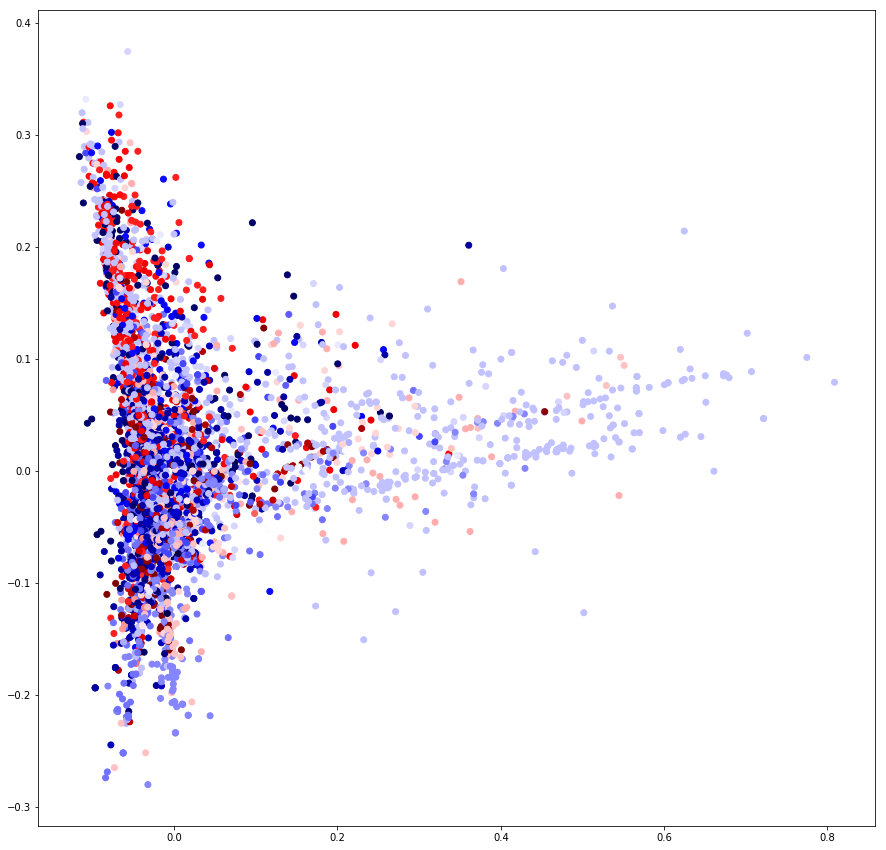

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(15,15))
plt.scatter(PCATrain[0], PCATrain[1], c=YTrain['intention'], cmap=cm.seismic_r)
plt.show()

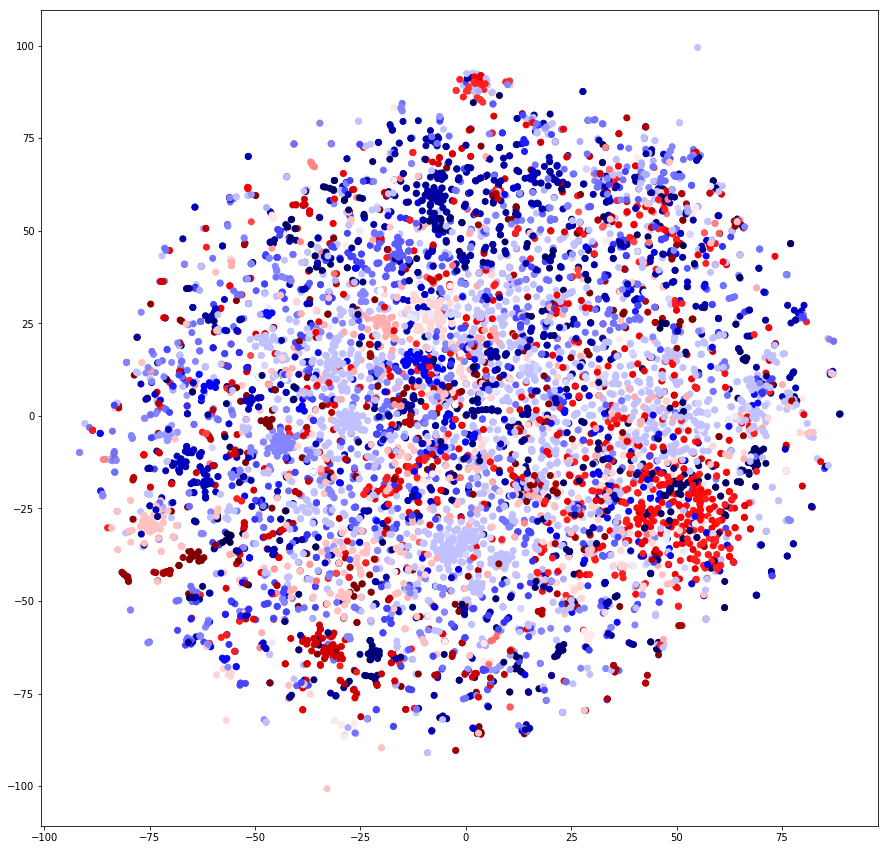

In [34]:
plt.figure(figsize=(15,15))
plt.scatter(TSNETrain[0], TSNETrain[1], c=YTrain['intention'], cmap=cm.seismic_r)
plt.show()